In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import pillow_avif
import numpy as np
import cv2
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'torchvision'

In [ ]:
CATEGORY_NAMES = ['Blazer', 'Blouse', 'Body', 'Dress', 'Hat', 'Hoodie', 'Longsleeve', 'Not sure', 'Other', 'Outwear', 'Pants', 'Polo', 'Shirt', 'Shoes', 'Shorts', 'Skip', 'Skirt', 'T-Shirt', 'Top', 'Undershirt']

In [45]:
# Define the model architecture (example: ResNet18)
model = models.resnet50(pretrained=False)  
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs,20)

/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [48]:
model.load_state_dict(torch.load('best_model.pth', map_location=torch.device('cpu')))  # Use 'cuda' if GPU available
model.eval() 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [50]:
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
def convert_to_jpg(input_path, output_path):
    try:
        # Open the image file
        img = Image.open(input_path)

        # Convert to RGB mode if necessary (JPG does not support transparency)
        if img.mode in ('RGBA', 'P'):
            img = img.convert('RGB')

        # Save the image in JPEG format
        img.save(output_path, "jpeg")
        print(f"Successfully converted '{input_path}' to '{output_path}'")
    except Exception as e:
        print(f"Error converting '{input_path}': {e}")

# Example usage:
# convert_to_jpg("brown_shirt.avif", "brown_shirt.jpg")

Successfully converted 'brown_shirt.avif' to 'brown_shirt.jpg'


In [137]:
img = cv2.imread("jeans.jpg")  # BGR format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
img = cv2.resize(img, (224,224))
tensor_img = torch.from_numpy(img).permute(2,0,1).float() / 255.0


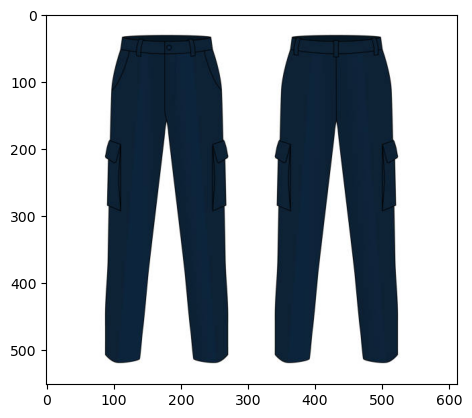

In [138]:
im = Image.open('jeans.jpg')
plt.imshow(im)
plt.show()

In [139]:
input_tensor = tensor_img.unsqueeze(0)

In [140]:
mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
input_tensor = (input_tensor - mean) / std

In [141]:
model.eval()
with torch.no_grad():
    output = model(input_tensor)

In [142]:
predicted_index = torch.argmax(output, dim=1).item()
predicted_label = CATEGORY_NAMES[predicted_index]
print("Predicted label:", predicted_label)

Predicted label: Pants
